In [2]:
import numpy as np
import pandas as pd
import string
import re

from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

import sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

from matplotlib import pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /Users/ajeon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ajeon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import Dataset

In [3]:
x_train_df = pd.read_csv('data_reviews/x_train.csv')
x_test_df = pd.read_csv('data_reviews/x_test.csv')
y_train_df = pd.read_csv('data_reviews/y_train.csv')

tr_text_list = x_train_df['text'].values.tolist()
te_text_list = x_test_df['text'].values.tolist()
y_train = y_train_df['is_positive_sentiment'].values.tolist()

## Count Vectorizer

In [4]:
def preprocess(text):
    # Remove punctuation and lowercase the text
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    
    # Stem the words
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(w) for w in tokens]
    
    # Return the preprocessed text
    return " ".join(tokens)

print(tr_text_list[2])
print(preprocess(tr_text_list[2]))

Waste of 13 bucks.
wast 13 buck


In [5]:
def temp_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    
    # remove stops using nltk
    stops = stopwords.words('english')
    words = [w for w in words if w not in stops]
    
    # stem the remaining words after removing stops; 
    porter_stemmer = PorterStemmer()

    words = [porter_stemmer.stem(word) for word in words]
    
    return words

In [6]:
x_full = tr_text_list + te_text_list

cv = CountVectorizer()
x = cv.fit_transform(x_full)
x_train = x.toarray()[0:2400].copy()
x_te = x.toarray()[2400:].copy()

vectorizer = TfidfVectorizer(tokenizer=temp_tokenizer)

BOW = vectorizer.fit_transform(x_full)
new_x = BOW.toarray()
new_x_train = new_x[:len(tr_text_list)]
new_x_te = new_x[len(tr_text_list):]

In [6]:
model = LogisticRegression()
model.fit(x_train, y_train)
yproba1_test = model.predict(x_te)
np.savetxt('yproba1_test.txt', yproba1_test)
print(yproba1_test)

[1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0
 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0
 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1
 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1
 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1
 0 1 0 1 0 1 0 1 1 0 0 1 

In [7]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=temp_tokenizer, use_idf=True, min_df=2, binary=True)

x_tr = []
for text in tr_text_list:
    sentence = preprocess(text)
    x_tr.append(sentence)
    
print(len(x_tr))
x_train = vectorizer.fit_transform(x_tr)

x_te = []
for text in te_text_list:
    sentence = preprocess(text)
    x_te.append(sentence)
    
x_test = vectorizer.transform(x_te)
print(x_train.shape, x_test.shape)

2400
(2400, 2264) (600, 2264)


## Logistic Regression

BEST SCORE: 
0.8029166666666667
STANDARD DEVIATION FOR BEST SCORE:
0.029480454918847883


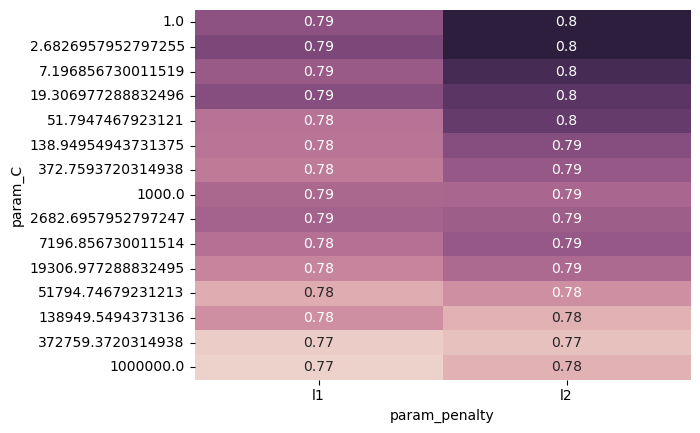

In [7]:
logistic_regression = LogisticRegression(solver='liblinear')

C = np.logspace(0, 6, 15)
penalty = ['l1', 'l2']
hyperparameters = dict(C=C, penalty=penalty)
# Create a grid search object to evaluate the model using cross-validation
grid_search_log = GridSearchCV(logistic_regression, hyperparameters, cv=5, verbose=0)

# Fit the model to the training data
grid_search_log.fit(x_train, y_train)

pivot = pd.pivot_table(pd.DataFrame(grid_search_log.cv_results_), values='mean_test_score', index='param_C', columns='param_penalty')
ax = sns.heatmap(pivot, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, annot=True)

print("BEST SCORE: ")
print(grid_search_log.best_score_)
print("STANDARD DEVIATION FOR BEST SCORE:")
print(grid_search_log.cv_results_['std_test_score'][grid_search_log.best_index_])


In [8]:
yproba1_test = grid_search_log.predict(x_te)
np.savetxt('yproba1_test_log.txt', yproba1_test)
print(yproba1_test)

[1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0
 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1
 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0
 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1
 0 1 0 1 0 1 0 1 1 1 0 1 

## MLP Classifier

In [ ]:
mlp = MLPClassifier()

hyperparams = {
    'hidden_layer_sizes': [(5,), (5,5), (5,10,5), (5,10,50,10,5), (5,10,50,100,50,10,5)],
    'activation': ['identity','logistic', 'relu', 'tanh'],
}

grid_search_mlpa = GridSearchCV(mlp, hyperparams, cv=5)
grid_search_mlpa.fit(x_train, y_train_df.values.ravel()) 

pivot_mlp = pd.pivot_table(pd.DataFrame(grid_search_mlpa.cv_results_), values='mean_test_score', index='param_hidden_layer_sizes', columns='param_activation')
ax_mlp = sns.heatmap(pivot_mlp, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, annot=True)

print("BEST SCORE: ")
print(grid_search_mlpa.best_score_)
print("STANDARD DEVIATION FOR BEST SCORE:")
print(grid_search_mlpa.cv_results_['std_test_score'][grid_search_mlpa.best_index_])


In [ ]:
yproba1_test = grid_search_mlpa.predict(x_test)
np.savetxt('yproba1_test_mlpa.txt', yproba1_test)
print(yproba1_test)

In [ ]:
mlp = MLPClassifier()

hyperparams = {
    'hidden_layer_sizes': [(5,), (5,5), (5,10,5), (5,10,50,10,5), (5,10,50,100,50,10,5)],
    'solver': ['adam','lbfgs', 'sgd'],
}

grid_search_mlps = GridSearchCV(mlp, hyperparams, cv=5)
grid_search_mlps.fit(x_train, y_train_df.values.ravel()) 

pivot_mlp = pd.pivot_table(pd.DataFrame(grid_search_mlps.cv_results_), values='mean_test_score', index='param_hidden_layer_sizes', columns='param_solver')
ax_mlp = sns.heatmap(pivot_mlp, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, annot=True)

print("BEST SCORE: ")
print(grid_search_mlps.best_score_)
print("STANDARD DEVIATION FOR BEST SCORE:")
print(grid_search_mlps.cv_results_['std_test_score'][grid_search_mlps.best_index_])

In [21]:
yproba1_test = grid_search_mlps.predict(x_test)
np.savetxt('yproba1_test_mlps.txt', yproba1_test)
print(yproba1_test)

[1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0
 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1
 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1
 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1
 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1
 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1
 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1
 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1
 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 0 0 1 1 1 0 1 

In [ ]:
mlp = MLPClassifier(max_iter=100)

hyperparams = {
    'hidden_layer_sizes': [(1,), (5,), (10,)],
    'activation': ['identity', 'tanh'],
}

grid_search = GridSearchCV(mlp, hyperparams, cv=5)
grid_search.fit(x_train, y_train_df.values.ravel()) 

pivot_mlp = pd.pivot_table(pd.DataFrame(grid_search.cv_results_), values='mean_test_score', index='param_hidden_layer_sizes', columns='param_activation')
ax_mlp = sns.heatmap(pivot_mlp, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, annot=True)

In [ ]:
mlp = MLPClassifier(max_iter=100)

hyperparams = {
    'hidden_layer_sizes': [(1,), (5,), (10,)],
    'solver': ['adam','lbfgs'],
}

grid_search = GridSearchCV(mlp, hyperparams, cv=5)
grid_search.fit(x_train, y_train_df.values.ravel()) 

pivot_mlp = pd.pivot_table(pd.DataFrame(grid_search.cv_results_), values='mean_test_score', index='param_hidden_layer_sizes', columns='param_solver')
ax_mlp = sns.heatmap(pivot_mlp, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, annot=True)

In [ ]:
svm = SVC(probability=True)

# Define the hyperparameters to explore
hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                   'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'kernel': ['linear','rbf'],
                  }

# Create a grid search object to evaluate the model using cross-validation
grid_search_svm = GridSearchCV(svm, hyperparameters, cv=5)

# Fit the model to the training data
grid_search_svm.fit(x_train, y_train)

pivot_svm = pd.pivot_table(pd.DataFrame(grid_search_svm.cv_results_), values='mean_test_score', index='param_C', columns='param_gamma')
ax_svm = sns.heatmap(pivot_svm, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, annot=True)

print("BEST SCORE: ")
print(grid_search_svm.best_score_)
print("STANDARD DEVIATION FOR BEST SCORE:")
print(grid_search_svm.cv_results_['std_test_score'][grid_search_log.best_index_])


In [ ]:
yproba1_test = grid_search_svm.predict(x_te)
np.savetxt('yproba1_test_svm.txt', yproba1_test)
print(yproba1_test)